In [1]:
import yfinance as yf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [2]:
df_apple_to_csv = yf.download("AAPL", start="2020-01-01", end="2025-08-13")
df_microsoft_to_csv = yf.download("MSFT", start="2020-01-01", end="2025-08-13")
df_amazon_to_csv = yf.download("AMZN", start="2020-01-01", end="2025-08-13")


apple_path = 'datasets/apple.csv'
microsoft_path = 'datasets/microsoft.csv'
amazon_path = 'datasets/amazon.csv'

df_apple_to_csv.to_csv(apple_path)
df_microsoft_to_csv.to_csv(microsoft_path)
df_amazon_to_csv.to_csv(amazon_path)

df_apple = pd.read_csv(apple_path)
df_microsoft = pd.read_csv(microsoft_path)
df_amazon = pd.read_csv(amazon_path)

C:\Users\acer\AppData\Local\Temp\ipykernel_19876\1102566560.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_apple_to_csv = yf.download("AAPL", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\acer\AppData\Local\Temp\ipykernel_19876\1102566560.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_microsoft_to_csv = yf.download("MSFT", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\acer\AppData\Local\Temp\ipykernel_19876\1102566560.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_amazon_to_csv = yf.download("AMZN", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed


In [3]:
df_apple.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,72.53852081298828,72.59889913772518,71.29231130597061,71.5458973217052,135480400
3,2020-01-03,71.83329010009766,72.59405542623057,71.60868452797844,71.76566667933918,146322800
4,2020-01-06,72.4056625366211,72.44430553740506,70.7029972337209,70.95417305361724,118387200


In [4]:
df_microsoft.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,153.04226684570312,153.14707784853206,150.8603108363314,151.28907783375524,22622100
3,2020-01-03,151.13662719726562,152.40388225400224,150.60304918156822,150.85079221664952,21116200
4,2020-01-06,151.52732849121094,151.59403303057528,149.1262122356397,149.66932792275708,20813700


In [5]:
df_amazon.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,94.90049743652344,94.90049743652344,93.2074966430664,93.75,80580000
3,2020-01-03,93.74849700927734,94.30999755859375,93.2249984741211,93.2249984741211,75288000
4,2020-01-06,95.14399719238281,95.18450164794922,93.0,93.0,81236000


In [6]:
df_apple['Date'] = df_apple['Price']
df_apple = df_apple.drop(index=[0,1], columns='Price')

df_microsoft['Date'] = df_microsoft['Price']
df_microsoft = df_microsoft.drop(index=[0,1], columns='Price')

df_amazon['Date'] = df_amazon['Price']
df_amazon = df_amazon.drop(index=[0,1], columns='Price')

In [7]:
df_apple.head()

,Close,High,Low,Open,Volume,Date
2,72.53852081298828,72.59889913772518,71.29231130597061,71.5458973217052,135480400,2020-01-02
3,71.83329010009766,72.59405542623057,71.60868452797844,71.76566667933918,146322800,2020-01-03
4,72.4056625366211,72.44430553740506,70.7029972337209,70.95417305361724,118387200,2020-01-06
5,72.06511688232422,72.67130991494236,71.84533901760405,72.41530654953137,108872000,2020-01-07
6,73.22441864013672,73.52631026770732,71.76809372355218,71.76809372355218,132079200,2020-01-08


In [8]:
df_microsoft.head()

,Close,High,Low,Open,Volume,Date
2,153.04226684570312,153.14707784853206,150.8603108363314,151.28907783375524,22622100,2020-01-02
3,151.13662719726562,152.40388225400224,150.60304918156822,150.85079221664952,21116200,2020-01-03
4,151.52732849121094,151.59403303057528,149.1262122356397,149.66932792275708,20813700,2020-01-06
5,150.14573669433594,152.1371317710887,149.89800813543405,151.8036526962878,21634100,2020-01-07
6,152.53729248046875,153.21380259511494,150.4982536880769,151.43201531179338,27746500,2020-01-08


In [9]:
df_amazon.head()

,Close,High,Low,Open,Volume,Date
2,94.90049743652344,94.90049743652344,93.2074966430664,93.75,80580000,2020-01-02
3,93.74849700927734,94.30999755859375,93.2249984741211,93.2249984741211,75288000,2020-01-03
4,95.14399719238281,95.18450164794922,93.0,93.0,81236000,2020-01-06
5,95.34300231933594,95.69450378417969,94.60199737548828,95.2249984741211,80898000,2020-01-07
6,94.59850311279297,95.55000305175781,94.3219985961914,94.9020004272461,70160000,2020-01-08


In [10]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 2 to 1411
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1410 non-null   object
 1   High    1410 non-null   object
 2   Low     1410 non-null   object
 3   Open    1410 non-null   object
 4   Volume  1410 non-null   object
 5   Date    1410 non-null   object
dtypes: object(6)
memory usage: 66.2+ KB


In [11]:
df_apple.describe()

,Close,High,Low,Open,Volume,Date
count,1410,1410,1410,1410,1410,1410
unique,1394,1410,1410,1410,1408,1410
top,139.26512145996094,230.8000030517578,227.07000732421875,228.00999450683594,90956700,2025-08-12
freq,2,1,1,1,2,1


In [12]:
df_apple.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
Date      0
dtype: int64

In [ ]:
dfs = [df_apple, df_amazon, df_microsoft]
window = 14
short_period = 12
long_period = 26
signal_line_period = 9

for df in dfs:
    df['Close'] = df['Close'].astype(float)
    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Open'] = df['Open'].astype(float)
    df['Volume'] = df['Volume'].astype(float)
    df['Date'] = pd.to_datetime(df['Date'])

    df['Price Change'] = df['Close'].diff().fillna(0)

    df['Gain'] = df.loc[df['Price Change'] > 0, 'Price Change']
    df['Loss'] = -df.loc[df['Price Change'] < 0, 'Price Change']

    df['Gain'] = df['Gain'].fillna(0)
    df['Loss'] = df['Loss'].fillna(0)

    df['Average Gain'] = df['Gain'].rolling(window=window).mean().fillna(0)
    df['Average Loss'] = df['Loss'].rolling(window=window).mean().fillna(0)

    #df = df.drop(index=list(range(2,15)))

    df['RS'] = df['Average Gain'] / df['Average Loss']

    df['RSI'] = 100 - (100 / (1 + df['RS']))

    df['Short EMA'] = df['Close'].ewm(span=short_period,adjust=False).mean()
    df['Long EMA'] = df['Close'].ewm(span=long_period, adjust=False).mean()

    df['MACD'] = df['Short EMA'] - df['Long EMA']

    df['Signal Line'] = df['MACD'].ewm(span=signal_line_period, adjust=False).mean()
    
    df['MACD Histogram'] = df['MACD'] - df['Signal Line']
    
    df = df.dropna()
    
    df['Year'] = df['Date'].dt.year
    
    print(df.head())


       Close       High        Low       Open       Volume       Date
2  72.538521  72.598899  71.292311  71.545897  135480400.0 2020-01-02
3  71.833290  72.594055  71.608685  71.765667  146322800.0 2020-01-03
4  72.405663  72.444306  70.702997  70.954173  118387200.0 2020-01-06
5  72.065117  72.671310  71.845339  72.415307  108872000.0 2020-01-07
6  73.224419  73.526310  71.768094  71.768094  132079200.0 2020-01-08
       Close       High        Low       Open      Volume       Date
2  94.900497  94.900497  93.207497  93.750000  80580000.0 2020-01-02
3  93.748497  94.309998  93.224998  93.224998  75288000.0 2020-01-03
4  95.143997  95.184502  93.000000  93.000000  81236000.0 2020-01-06
5  95.343002  95.694504  94.601997  95.224998  80898000.0 2020-01-07
6  94.598503  95.550003  94.321999  94.902000  70160000.0 2020-01-08
        Close        High         Low        Open      Volume       Date
2  153.042267  153.147078  150.860311  151.289078  22622100.0 2020-01-02
3  151.136627  152.4

In [14]:

# df_apple['Close'] = df_apple['Close'].astype(float)
# df_apple['High'] = df_apple['High'].astype(float)
# df_apple['Low'] = df_apple['Low'].astype(float)
# df_apple['Open'] = df_apple['Open'].astype(float)
# df_apple['Volume'] = df_apple['Volume'].astype(float)
# df_apple['Date'] = pd.to_datetime(df_apple['Date'])

In [ ]:
# df_apple.describe()

,Close,High,Low,Open,Volume,Date
count,1410.000000,1410.000000,1410.000000,1410.000000,1.410000e+03,1410
mean,158.653070,160.302882,156.833869,158.492042,8.705896e+07,2022-10-20 08:51:03.829787136
min,54.316929,55.316747,51.469994,55.215071,2.323470e+07,2020-01-02 00:00:00
25%,129.986828,131.399733,128.380739,129.910681,5.286620e+07,2021-05-26 06:00:00
50%,158.771355,160.542160,156.498341,158.399760,7.325130e+07,2022-10-18 12:00:00
75%,188.764465,189.984086,187.366203,188.488577,1.033882e+08,2024-03-14 18:00:00
max,258.103729,259.179926,256.718662,257.276679,4.265100e+08,2025-08-12 00:00:00
std,44.575531,44.838236,44.244234,44.524546,5.190117e+07,NaN


In [ ]:
# df_apple[df_apple['Close'] < 0].head()

,Close,High,Low,Open,Volume,Date


In [ ]:
# #AAPL FEATURE ENGINEERING

# #CALCULATING RSI VALUE FOR TO CHECK MOMENTUM
# window = 14

# df_apple['Price Change'] = df_apple['Close'].diff().fillna(0)

# df_apple['Gain'] = df_apple.loc[df_apple['Price Change'] > 0, 'Price Change']
# df_apple['Loss'] = -df_apple.loc[df_apple['Price Change'] < 0, 'Price Change']

# df_apple['Gain'] = df_apple['Gain'].fillna(0)
# df_apple['Loss'] = df_apple['Loss'].fillna(0)

# df_apple['Average Gain'] = df_apple['Gain'].rolling(window=window).mean().fillna(0)
# df_apple['Average Loss'] = df_apple['Loss'].rolling(window=window).mean().fillna(0)

# #df_apple = df_apple.drop(index=list(range(2,15)))

# df_apple['RS'] = df_apple['Average Gain'] / df_apple['Average Loss']

# df_apple['RSI'] = 100 - (100 / (1 + df_apple['RS']))

# # df_apple['Target Close'] = df_apple['Close'].shift(-1) 

# df_apple.head()
# # df_apple['Average Gain']
# # df_apple['Average Loss']
# # df_apple['RS']
# # df_apple['RSI']

,Close,High,Low,Open,Volume,Date,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI
2,72.538521,72.598899,71.292311,71.545897,135480400.0,2020-01-02,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN
3,71.833290,72.594055,71.608685,71.765667,146322800.0,2020-01-03,-0.705231,0.000000,0.705231,0.0,0.0,NaN,NaN
4,72.405663,72.444306,70.702997,70.954173,118387200.0,2020-01-06,0.572372,0.572372,0.000000,0.0,0.0,NaN,NaN
5,72.065117,72.671310,71.845339,72.415307,108872000.0,2020-01-07,-0.340546,0.000000,0.340546,0.0,0.0,NaN,NaN
6,73.224419,73.526310,71.768094,71.768094,132079200.0,2020-01-08,1.159302,1.159302,0.000000,0.0,0.0,NaN,NaN


In [ ]:
# df_apple = df_apple.drop(columns=['Gain', 'Loss'])

In [ ]:
#FEATURE ENGINEERING

#CALCULATING MACD VALUE FOR VOLATILITY
# short_period = 12
# long_period = 26
# signal_line_period = 9

# # df_apple['Short EMA'] = (df_apple['Close'] * (2 / (short_period + 1))) + ( (1 - (2 / (short_period + 1))) * df_apple['Close'].shift(1))
# # df_apple['Long EMA'] = (df_apple['Close'] * (2 / (long_period + 1))) + ( (1 - (2 / (long_period + 1))) * df_apple['Close'].shift(1))

# df_apple['Short EMA'] = df_apple['Close'].ewm(span=short_period,adjust=False).mean()
# df_apple['Long EMA'] = df_apple['Close'].ewm(span=long_period, adjust=False).mean()

# df_apple['MACD'] = df_apple['Short EMA'] - df_apple['Long EMA']

# # df_apple['Signal Line'] = (df_apple['MACD'] * (2 / (signal_line_period + 1))) + ( (1 - (2 / (signal_line_period + 1))) * df_apple['MACD'].shift(1))
# df_apple['Signal Line'] = df_apple['MACD'].ewm(span=signal_line_period, adjust=False).mean()

# df_apple['MACD Histogram'] = df_apple['MACD'] - df_apple['Signal Line']


In [ ]:
# df_apple.head(n=27)     

,Close,High,Low,Open,Volume,Date,Price Change,Average Gain,Average Loss,RS,RSI,Short EMA,Long EMA,MACD,Signal Line,MACD Histogram
2,72.538521,72.598899,71.292311,71.545897,135480400.0,2020-01-02,0.000000,0.000000,0.000000,NaN,NaN,72.538521,72.538521,0.000000,0.000000,0.000000
3,71.833290,72.594055,71.608685,71.765667,146322800.0,2020-01-03,-0.705231,0.000000,0.000000,NaN,NaN,72.430024,72.486282,-0.056258,-0.011252,-0.045006
4,72.405663,72.444306,70.702997,70.954173,118387200.0,2020-01-06,0.572372,0.000000,0.000000,NaN,NaN,72.426276,72.480310,-0.054034,-0.019808,-0.034226
5,72.065117,72.671310,71.845339,72.415307,108872000.0,2020-01-07,-0.340546,0.000000,0.000000,NaN,NaN,72.370713,72.449555,-0.078842,-0.031615,-0.047227
6,73.224419,73.526310,71.768094,71.768094,132079200.0,2020-01-08,1.159302,0.000000,0.000000,NaN,NaN,72.502052,72.506952,-0.004900,-0.026272,0.021372
7,74.779755,74.972962,73.951366,74.202534,170108400.0,2020-01-09,1.555336,0.000000,0.000000,NaN,NaN,72.852468,72.675308,0.177160,0.014415,0.162746
8,74.948822,75.513970,74.446478,75.014035,140644800.0,2020-01-10,0.169067,0.000000,0.000000,NaN,NaN,73.174984,72.843716,0.331268,0.077785,0.253483
9,76.550049,76.576619,75.146857,75.265204,121532000.0,2020-01-13,1.601227,0.000000,0.000000,NaN,NaN,73.694225,73.118259,0.575965,0.177421,0.398544
10,75.516365,76.697368,75.393198,76.487253,161954400.0,2020-01-14,-1.033684,0.000000,0.000000,NaN,NaN,73.974554,73.295897,0.678657,0.277668,0.400989
11,75.192734,76.197430,74.760423,75.315908,121923600.0,2020-01-15,-0.323631,0.000000,0.000000,NaN,NaN,74.161966,73.436403,0.725563,0.367247,0.358316


In [ ]:
# print(df_apple.shape)
# df_apple.info()

(1410, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 2 to 1411
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Close           1410 non-null   float64       
 1   High            1410 non-null   float64       
 2   Low             1410 non-null   float64       
 3   Open            1410 non-null   float64       
 4   Volume          1410 non-null   float64       
 5   Date            1410 non-null   datetime64[ns]
 6   Price Change    1410 non-null   float64       
 7   Average Gain    1410 non-null   float64       
 8   Average Loss    1410 non-null   float64       
 9   RS              1397 non-null   float64       
 10  RSI             1397 non-null   float64       
 11  Short EMA       1410 non-null   float64       
 12  Long EMA        1410 non-null   float64       
 13  MACD            1410 non-null   float64       
 14  Signal Line     1410 non-null   float64      

In [ ]:
# df_apple = df_apple.dropna()

In [ ]:
# df_apple.head()

,Close,High,Low,Open,Volume,Date,Price Change,Average Gain,Average Loss,RS,RSI,Short EMA,Long EMA,MACD,Signal Line,MACD Histogram
15,76.728775,77.281835,76.634581,76.941301,101832400.0,2020-01-22,0.272903,0.508215,0.208911,2.432684,70.868274,75.349474,74.270929,1.078545,0.738868,0.339677
16,77.098282,77.177978,76.233660,76.781900,104472000.0,2020-01-23,0.369507,0.534609,0.208911,2.559021,71.902387,75.618521,74.480362,1.138159,0.818727,0.319432
17,76.876099,78.088493,76.685301,77.344635,146537600.0,2020-01-24,-0.222183,0.534609,0.174408,3.065276,75.401425,75.811995,74.657824,1.154170,0.885815,0.268355
18,74.615501,75.296563,73.632541,74.883578,161940000.0,2020-01-27,-2.260597,0.493725,0.335879,1.469948,59.513312,75.627919,74.654689,0.973230,0.903298,0.069931
19,76.726341,76.897814,75.398018,75.497040,162234000.0,2020-01-28,2.110840,0.644499,0.311555,2.068656,67.412444,75.796907,74.808145,0.988762,0.920391,0.068371


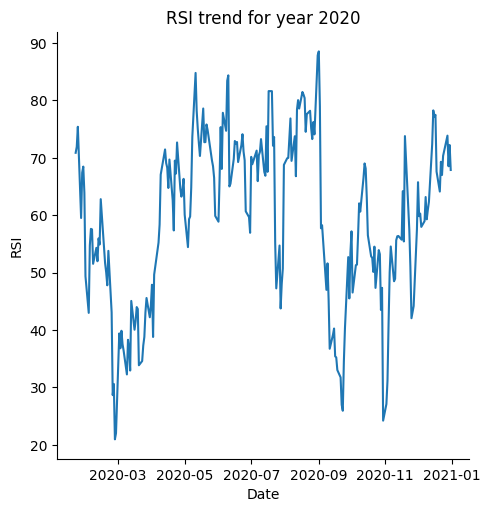

<Figure size 2000x1000 with 0 Axes>

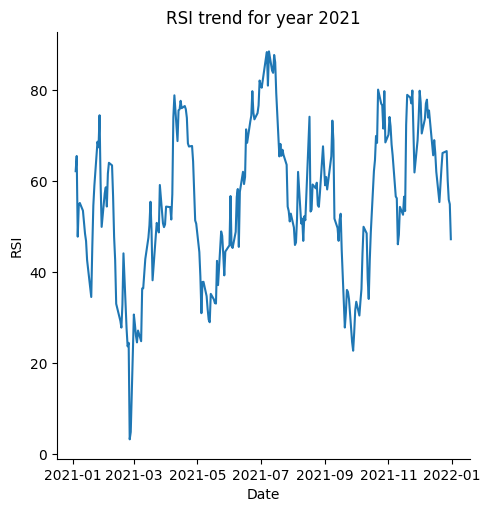

<Figure size 2000x1000 with 0 Axes>

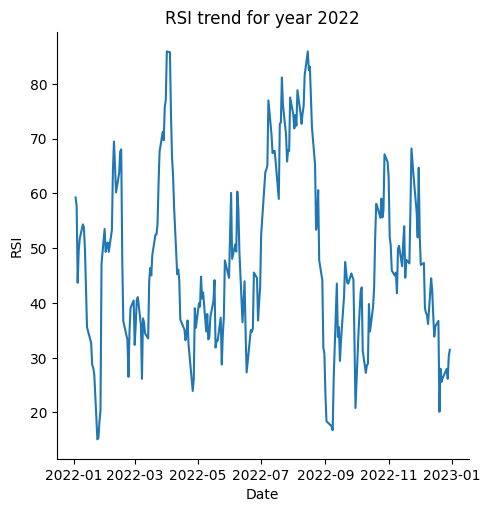

<Figure size 2000x1000 with 0 Axes>

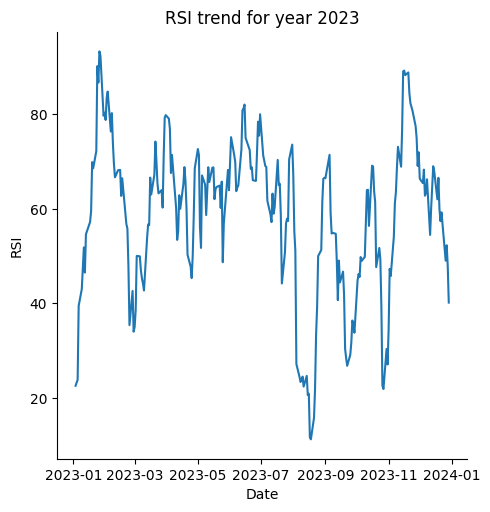

<Figure size 2000x1000 with 0 Axes>

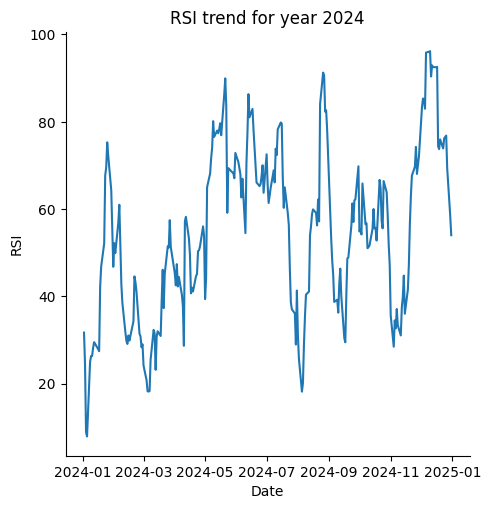

<Figure size 2000x1000 with 0 Axes>

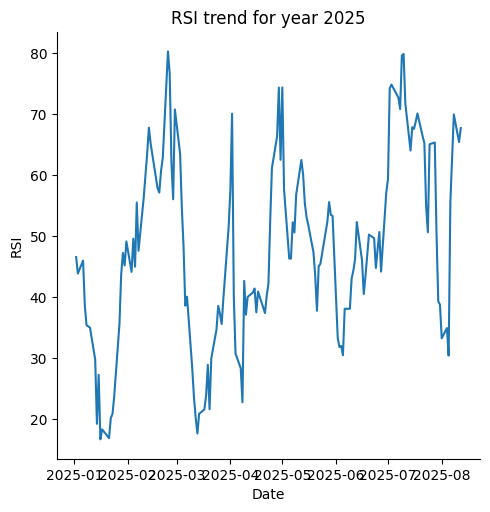

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# sns.relplot(data=df_apple.loc[(df_apple['Date'].dt.year >= 2023) & (df_apple['Date'].dt.year < 2025), :], x='Date', y='RSI', kind='line')
# plt.show()

# df_apple['Year'] = df_apple['Date'].dt.year

years = list(range(2020,2026))

for year in years:
    sns.relplot(data=df_apple.loc[df_apple['Year'] == year], x='Date', y='RSI', kind='line')
    plt.title(f'RSI trend for year {year}')
    plt.figure(figsize=(20,10))
    plt.show()

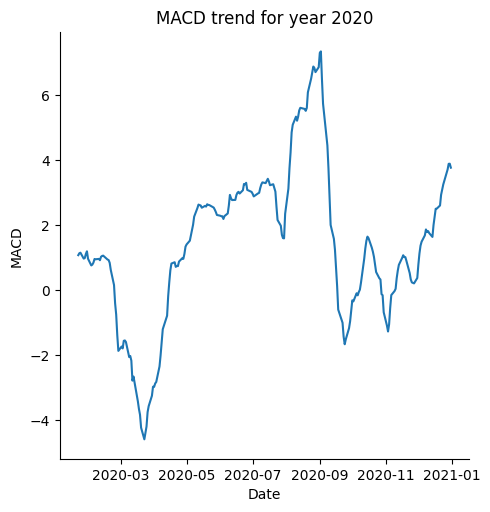

<Figure size 2000x1000 with 0 Axes>

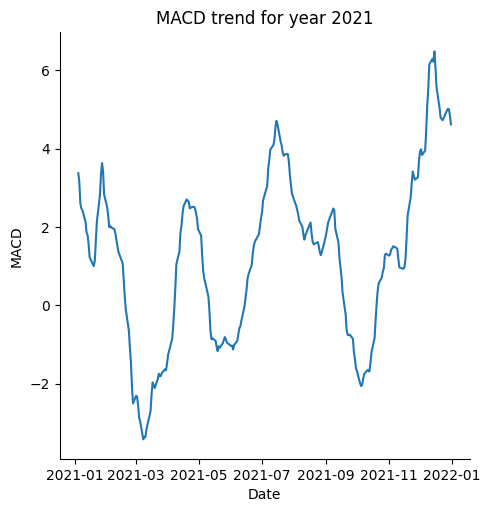

<Figure size 2000x1000 with 0 Axes>

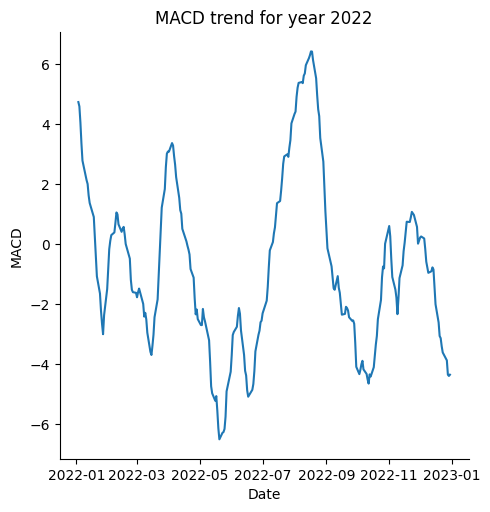

<Figure size 2000x1000 with 0 Axes>

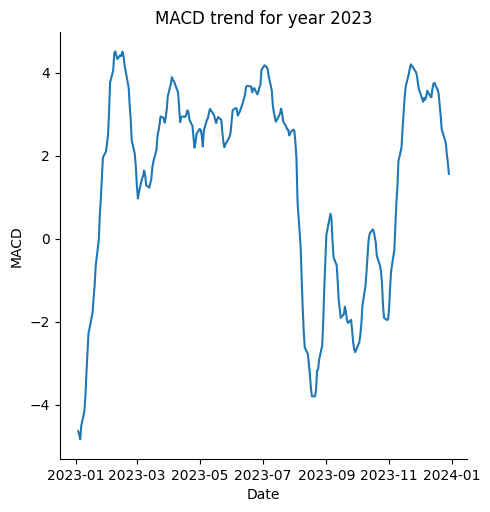

<Figure size 2000x1000 with 0 Axes>

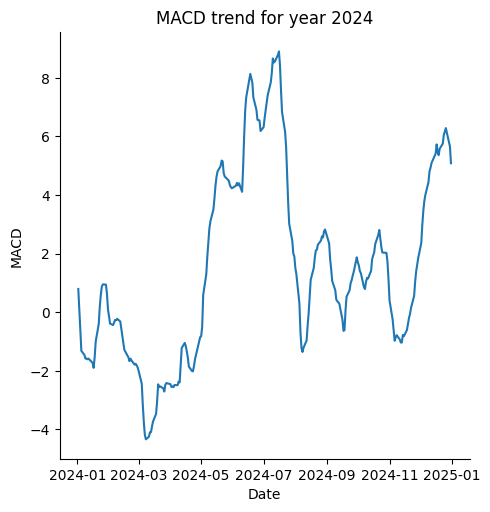

<Figure size 2000x1000 with 0 Axes>

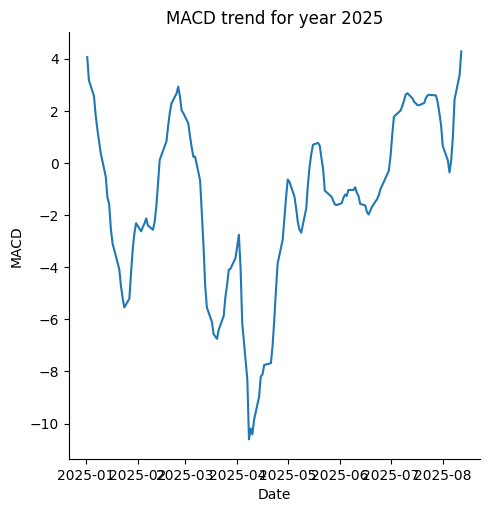

<Figure size 2000x1000 with 0 Axes>

In [25]:
#MACD	Signal Line	MACD Histogram
for year in years:
    sns.relplot(data=df_apple.loc[df_apple['Year'] == year], x='Date', y='MACD', kind='line')
    plt.title(f'MACD trend for year {year}')
    plt.figure(figsize=(20,10))
    plt.show()

In [26]:
df_apple.head()

,Close,High,Low,Open,Volume,Date,Price Change,Average Gain,Average Loss,RS,RSI,Short EMA,Long EMA,MACD,Signal Line,MACD Histogram,Year
15,76.728775,77.281835,76.634581,76.941301,101832400.0,2020-01-22,0.272903,0.508215,0.208911,2.432684,70.868274,75.349474,74.270929,1.078545,0.738868,0.339677,2020
16,77.098282,77.177978,76.233660,76.781900,104472000.0,2020-01-23,0.369507,0.534609,0.208911,2.559021,71.902387,75.618521,74.480362,1.138159,0.818727,0.319432,2020
17,76.876099,78.088493,76.685301,77.344635,146537600.0,2020-01-24,-0.222183,0.534609,0.174408,3.065276,75.401425,75.811995,74.657824,1.154170,0.885815,0.268355,2020
18,74.615501,75.296563,73.632541,74.883578,161940000.0,2020-01-27,-2.260597,0.493725,0.335879,1.469948,59.513312,75.627919,74.654689,0.973230,0.903298,0.069931,2020
19,76.726341,76.897814,75.398018,75.497040,162234000.0,2020-01-28,2.110840,0.644499,0.311555,2.068656,67.412444,75.796907,74.808145,0.988762,0.920391,0.068371,2020


In [27]:
X = df_apple.drop(columns=['Date', 'Close'])
y = df_apple['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
    ])

In [29]:
kfold = KFold(n_splits=6, random_state=30, shuffle=True)

cv = GridSearchCV(estimator=model,param_grid={
    'lr__n_jobs': [10,20,50],
    'scaler__with_mean':[True, False]
    },cv=kfold)

cv.fit(X_train, y_train)

print("Best parameter:", cv.best_params_)
print("Best score:", cv.best_score_)


Best parameter: {'lr__n_jobs': 10, 'scaler__with_mean': True}
Best score: 0.9996759727109293


In [30]:
y_pred = cv.predict(X_test)

print("Predicted values respectively:",y_pred[0:10])

print("Correct values:")
print(y_test[0:10])

Predicted values respectively: [133.85923926 226.10599385 229.25878485 190.12901712 173.25180842
 151.84382533 141.87651144 213.65598709 206.6958512  192.09895838]
Correct values:
378     133.879700
1280    227.203445
1234    229.056870
994     191.558212
493     172.296021
687     151.331161
708     141.161713
1407    213.008255
1354    206.625504
1003    191.974670
Name: Close, dtype: float64
